In [1]:
import datetime
import math
import numpy as np
import scipy as sp
import scipy.fftpack
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#matplotlib inline
import pyproj
import pymap3d as pm

from astropy.time import Time



In [93]:
## input data
data = pd.read_csv("data/001a.cts", sep=" ")

#data["dates"]
data['Lat'], data['Lon'], data['Alt'] = pm.ecef2geodetic(data['X'], data['Y'], data['Z'], ell=None, deg=True)
#data['ddate'] = pd.to_datetime(data['dates'], format='%d/%m/%Y')
#data['date'] = pd.to_datetime(data.date + data.h.astype(str),format='%d/%m/%Y %H').dt.time
#data['date']
#data['time'] =data['h'].astype(str) +':'+ data['min'].astype(str)+':'+data['sec'].astype(str)
#data['Date'] = pd.to_datetime(data['odate'].astype(str) +' '+ data['otime'].astype(str))
data['Date'] = pd.to_datetime(data['odate'].astype(str) +' '+ '12:00:00')
#data['Date'] = (data['odate'].astype(str) +' '+ data['otime'].astype(str)).apply(pd.Timestamp)

#data['jd'] = data['mjd'] + 2400000.5

data['mjd'] = Time(data['Date'], format='datetime64').mjd

#data['Date'] = Time(data['mjd'], format='mjd').datetime

#P = pyproj.Proj(proj='utm', zone=34, ellps='WGS84', preserve_units=False)
#data['utmE'], data['utmN'] = P(data['Lon'], data['Lat'])

## set index
data = data.set_index(['Date'])

data.drop_duplicates(subset=['odate'], keep='last', inplace=True)                             
data.sort_values(by=['mjd'], ascending=False, inplace=True)                                                    

data
## convert and make index to dataframwe
#time_data = "3/4/2022 12:16:25.123"
#format_data = "%d/%m/%Y"
#date = datetime.strptime(data['dates'], format_data)
#data
#header= ['X','Y','Z',]
#data.to_csv('data/test_p2.txt', columns=header)
#utmout = data[['utmE', 'utmN', 'Alt']].copy()
#
#utmout
#utmout.to_csv('Outputs/utm_ts.txt')


,odate,otime,X,sX,Y,sY,Z,sZ,lat,slat,...,slon,alt,salt,pdate,ptime,com,Lat,Lon,Alt,mjd
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-31 12:00:00,2021-12-31,11:59:45,4.652929e+06,0.00501,1.800366e+06,0.00278,3.960523e+06,0.00400,38.631359,0.00192,...,0.00216,147.88785,0.00636,2022-06-16,16:12:16,ekxa21,38.631359,21.153043,147.887807,59579.5
2021-12-30 12:00:00,2021-12-30,11:59:45,4.652929e+06,0.00307,1.800366e+06,0.00230,3.960523e+06,0.00250,38.631359,0.00110,...,0.00223,147.89172,0.00384,2022-06-16,17:13:49,ekxa21,38.631359,21.153043,147.891677,59578.5
2021-12-29 12:00:00,2021-12-29,11:59:45,4.652929e+06,0.00925,1.800366e+06,0.00460,3.960523e+06,0.00488,38.631359,0.00477,...,0.00318,147.93011,0.00989,2022-06-16,18:07:38,ekxa21,38.631359,21.153042,147.930070,59577.5
2021-12-28 12:00:00,2021-12-28,11:59:45,4.652929e+06,0.00280,1.800366e+06,0.00144,3.960523e+06,0.00244,38.631359,0.00102,...,0.00101,147.88393,0.00372,2022-06-16,18:57:41,ekxa21,38.631359,21.153043,147.883891,59576.5
2021-12-27 12:00:00,2021-12-27,11:59:45,4.652929e+06,0.00313,1.800366e+06,0.00156,3.960523e+06,0.00274,38.631359,0.00112,...,0.00111,147.89035,0.00415,2022-06-16,19:49:14,ekxa21,38.631359,21.153043,147.890316,59575.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-05 12:00:00,2015-01-05,11:59:45,4.652929e+06,0.00275,1.800366e+06,0.00137,3.960523e+06,0.00239,38.631359,0.00103,...,0.00090,147.90988,0.00365,2022-11-08,15:27:25,ekxa21,38.631359,21.153042,147.909838,57027.5
2015-01-04 12:00:00,2015-01-04,11:59:45,4.652929e+06,0.00282,1.800366e+06,0.00142,3.960523e+06,0.00246,38.631359,0.00105,...,0.00092,147.90473,0.00375,2022-11-08,14:52:23,ekxa21,38.631359,21.153042,147.904685,57026.5
2015-01-03 12:00:00,2015-01-03,11:59:45,4.652929e+06,0.00269,1.800366e+06,0.00133,3.960523e+06,0.00234,38.631359,0.00098,...,0.00086,147.90720,0.00358,2022-11-08,11:49:50,ekxa21,38.631359,21.153042,147.907161,57025.5


In [73]:
## convert to E N UP
meanX=data['X'].mean()
meanY=data['Y'].mean()
meanZ=data['Z'].mean()

ecef = pyproj.Proj(proj='geocent', ellps='WGS84', datum='WGS84')
lla = pyproj.Proj(proj='latlong', ellps='WGS84', datum='WGS84')
#mLon, mLat, mAlt = pyproj.transform(ecef, lla, meanX, meanY, meanZ, radians=False)
mLat, mLon, mAlt = pm.ecef2geodetic(meanX, meanY, meanZ,  ell=None, deg=True)



print(mLon, mLat, mAlt)


# mLon_r=math.radians(mLon)
# mLat_r=math.radians(mLat)
# print(meanLon, meanLat, meanAlt)

data['dX'] = data['X'] - meanX
data['dY'] = data['Y'] - meanY
data['dZ'] = data['Z'] - meanZ

## make rotational matrix
#R = [ 
#    [-math.sin(mLat_r)*math.cos(mLon_r), -math.sin(mLat_r)*math.sin(mLon_r), math.cos(mLat_r)],
#    [-math.sin(mLon_r), math.cos(mLon_r), 0],
#    [math.cos(mLat_r)*math.cos(mLon_r), math.cos(mLat_r)*math.sin(mLon_r), math.sin(mLat_r)]
#]


data['dN'], data['dE'], data['dU'] = pm.ecef2enu(data['X'], data['Y'], data['Z'], mLat, mLon, mAlt, ell=None, deg=True)
data['dN'] = data['dN']*1000.
data['dE'] = data['dE']*1000.
data['dU'] = data['dU']*1000.

#indexdN = data[ (data['dN'] >= 40) | (data['dN'] <=-40) ].index
#data.drop(indexdN , inplace=True)
header= ['mjd','dN', 'dE', 'dU']
data.to_csv('test_p.csv', columns=header, index=False, header=False, sep=' ')
data

21.153042264499824 38.631359250705245 147.90575451891445


,odate,otime,X,sX,Y,sY,Z,sZ,lat,slat,...,Lat,Lon,Alt,mjd,dX,dY,dZ,dN,dE,dU
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01 12:00:00,2015-01-01,11:59:45,4.652929e+06,0.00266,1.800366e+06,0.00131,3.960523e+06,0.00231,38.631359,0.00097,...,38.631359,21.153042,147.913423,57023.5,0.015418,-0.045084,0.014647,-47.609752,12.621070,7.668051
2015-01-01 12:00:00,2015-01-01,11:59:45,4.652929e+06,0.00266,1.800366e+06,0.00131,3.960523e+06,0.00231,38.631359,0.00097,...,38.631359,21.153042,147.913383,57023.5,0.015368,-0.045094,0.014647,-47.601035,12.652435,7.628804
2015-01-02 12:00:00,2015-01-02,11:59:45,4.652929e+06,0.00255,1.800366e+06,0.00128,3.960523e+06,0.00222,38.631359,0.00096,...,38.631359,21.153042,147.910729,57024.5,0.013168,-0.045304,0.013057,-47.002993,12.738602,4.974163
2015-01-03 12:00:00,2015-01-03,11:59:45,4.652929e+06,0.00269,1.800366e+06,0.00133,3.960523e+06,0.00234,38.631359,0.00098,...,38.631359,21.153042,147.907161,57025.5,0.011668,-0.046444,0.009607,-47.524889,11.173725,1.406127
2015-01-04 12:00:00,2015-01-04,11:59:45,4.652929e+06,0.00282,1.800366e+06,0.00142,3.960523e+06,0.00246,38.631359,0.00105,...,38.631359,21.153042,147.904685,57026.5,0.010758,-0.048134,0.007467,-48.772633,10.412578,-1.069270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27 12:00:00,2021-12-27,11:59:45,4.652929e+06,0.00313,1.800366e+06,0.00156,3.960523e+06,0.00274,38.631359,0.00112,...,38.631359,21.153043,147.890316,59575.5,-0.024312,0.058986,-0.022993,63.784979,-17.095749,-15.438918
2021-12-28 12:00:00,2021-12-28,11:59:45,4.652929e+06,0.00280,1.800366e+06,0.00144,3.960523e+06,0.00244,38.631359,0.00102,...,38.631359,21.153043,147.883891,59576.5,-0.031722,0.054726,-0.022713,62.485994,-11.602885,-21.863495
2021-12-29 12:00:00,2021-12-29,11:59:45,4.652929e+06,0.00925,1.800366e+06,0.00460,3.960523e+06,0.00488,38.631359,0.00477,...,38.631359,21.153042,147.930070,59577.5,0.039188,0.009766,-0.011193,-5.033203,-33.761501,24.315440


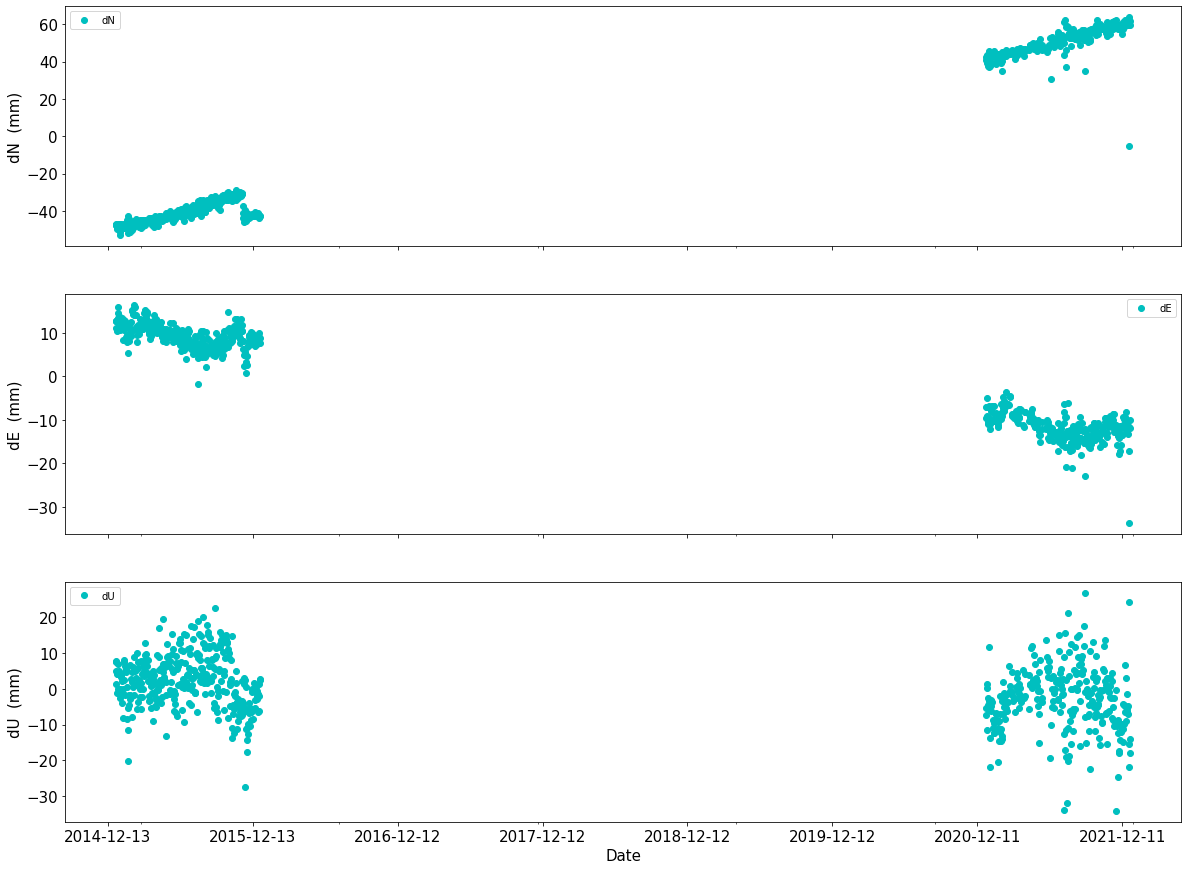

In [5]:
## make time series for the three axes
fig, axes = plt.subplots(3, 1, figsize=(20,15), sharex=True,)

plot_cols = ['dN', 'dE', 'dU' ]

data[plot_cols].plot(subplots=True, ax=axes, linestyle='', marker='o', color='c')

month_day_formatter = mdates.DateFormatter("%Y-%m-%d")

for ax, col in zip(axes, plot_cols):
    # add axis labels
    ax.set_ylabel(col + '  (mm)',fontsize=15)
    ax.set_xlabel('Date', fontsize=15)
    ax.xaxis.set_major_formatter(month_day_formatter)
    # We change the fontsize of minor ticks label 
    ax.tick_params(axis='both', which='major', labelsize=15)
    #ax.tick_params(axis='both', which='minor', labelsize=8)
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=365))
    
    
## Save the figure
## =================================================================================
#fig.savefig("Outputs/ts/timeseries_T8.png")
## =================================================================================

KeyError: "['utmE', 'utmN'] not in index"

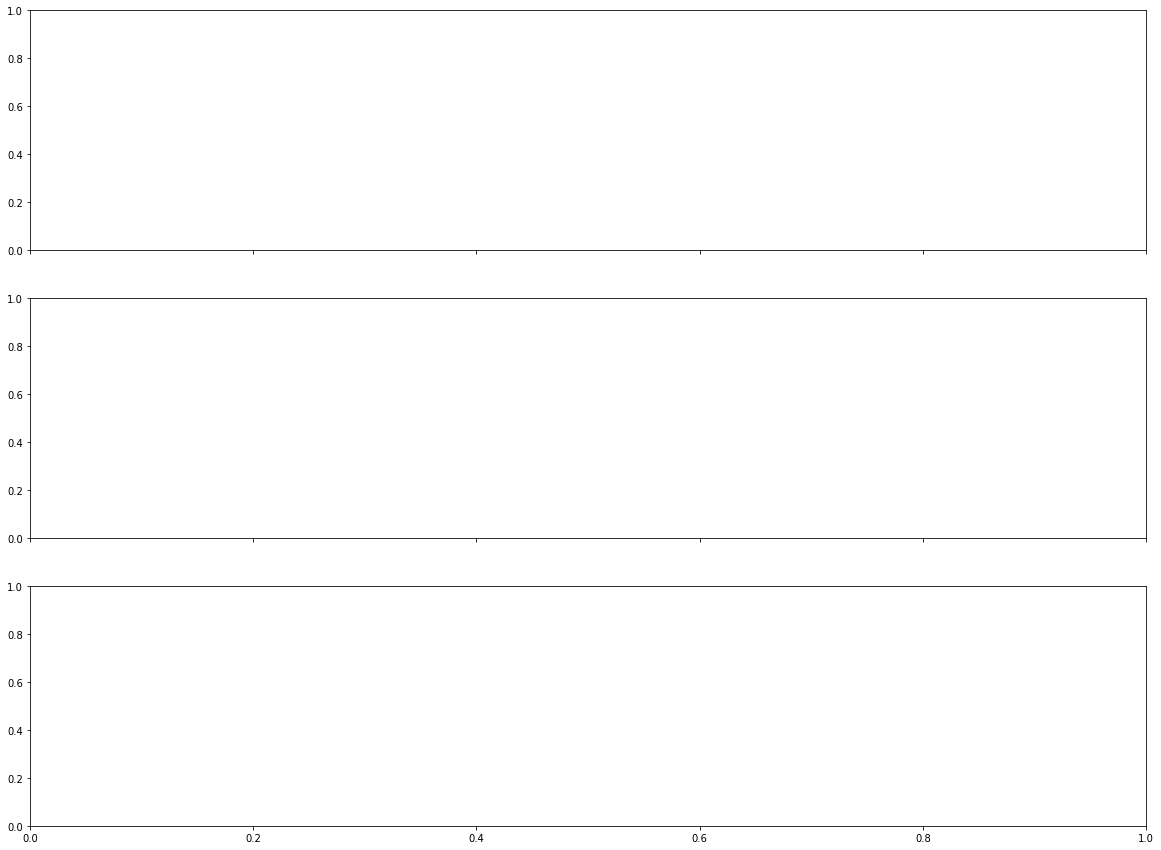

In [96]:
## make time series for the three axes
fig, axes = plt.subplots(3, 1, figsize=(20,15), sharex=True,)

plot_cols = ['utmE', 'utmN', 'Alt' ]

data[plot_cols].plot(subplots=True, ax=axes, linestyle='', marker='o', color='c')

month_day_formatter = mdates.DateFormatter("%Y-%m-%d")

for ax, col in zip(axes, plot_cols):
    # add axis labels
    ax.set_ylabel(col + '  (m)',fontsize=15)
    ax.set_xlabel('Date', fontsize=15)
    ax.xaxis.set_major_formatter(month_day_formatter)
    # We change the fontsize of minor ticks label 
    ax.tick_params(axis='both', which='major', labelsize=15)
    #ax.tick_params(axis='both', which='minor', labelsize=8)
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=15))
    
    
## Save the figure
## =================================================================================
#fig.savefig("Outputs/ts/timeseries_T8.png")
## =================================================================================


In [12]:
cust = "+proj=tmerc +lat_0=49 +lon_0=-2 +k=0.9996012717 +x_0=59011 +y_0=-1001635 +ellps=airy +datum=OSGB36 +units=m +no_defs"


In [95]:
Time('2014-02-03', format='iso').mjd


56691.0